- bsprice = option price based on black scholes model
- crrBinomial = option price based on Cox-Ross-Rubinstein (CRR) binomial model 

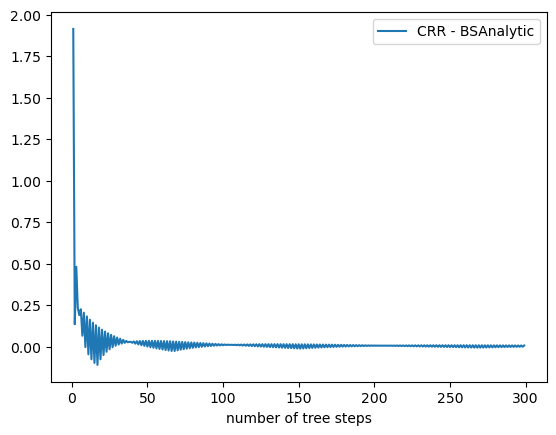

'\nnormal scale for y axis\nmeaning that each unit increase on yaxis represent same increase in error maginitude\n\ngraph shows that error is high when step numbres are low\n'

In [7]:
import time
import timeit
from enum import Enum
import math
import matplotlib.pyplot as plt
import numpy as np

# one step binomial
from enum import Enum
import math

class PayoffType(str, Enum):
    Call = 'Call'
    Put = 'Put'

# Black-Scholes analytic pricer
def cnorm(x):
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

def bsPrice(S, r, vol, T, strike, payoffType):
    fwd = S * math.exp(r * T)
    stdev = vol * math.sqrt(T)
    d1 = math.log(fwd / strike) / stdev + stdev / 2
    d2 = d1 - stdev
    if payoffType == PayoffType.Call:
        return math.exp(-r * T) * (fwd * cnorm(d1) - cnorm(d2) * strike)
    elif payoffType == PayoffType.Put:
        return math.exp(-r * T) * (strike * cnorm(-d2) - cnorm(-d1) * fwd)
    elif payoffType == PayoffType.BinaryCall:
        return math.exp(-r * T) * cnorm(d1)
    elif payoffType == PayoffType.BinaryPut:
        return math.exp(-r * T) * (1-cnorm(-d1))
    else:
        raise Exception("not supported payoff type", payoffType)
        
def crrBinomial(S, r, vol, payoffType, K, T, n):
    t = T / n
    b = math.exp(vol * vol * t+r*t) + math.exp(-r * t)
    u = (b + math.sqrt(b*b - 4)) / 2
    p = (math.exp(r * t) - (1/u)) / (u - 1/u)
    # set up the last time slice, there are n+1 nodes at the last time slice
    payoffDict = {
        PayoffType.Call: lambda s: max(s-K, 0),
        PayoffType.Put: lambda s: max(K-s, 0),
    }
    vs = [payoffDict[payoffType]( S * u**(n-i-i)) for i in range(n+1)]
    # iterate backward
    for i in range(n-1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i+1):
            vs[j] = math.exp(-r * t) * (vs[j] * p + vs[j+1] * (1-p))
    return vs[0]
        
n = 300
S, r, vol, K, T = 100, 0.01, 0.2, 105, 1.0
bsPrc = bsPrice(S, r, vol, T, K, PayoffType.Call)
crrErrs = [(crrBinomial(S,r,vol,PayoffType.Call,K,T,i) - bsPrc) for i in range(1, n)]

plt.plot(range(1, n), crrErrs, label = "CRR - BSAnalytic")
plt.xlabel('number of tree steps')
plt.legend()
# plt.yscale('log')
plt.show()

'''
normal scale for y axis
meaning that each unit increase on yaxis represent same increase in error maginitude

graph shows that error is high when step numbres are low
'''

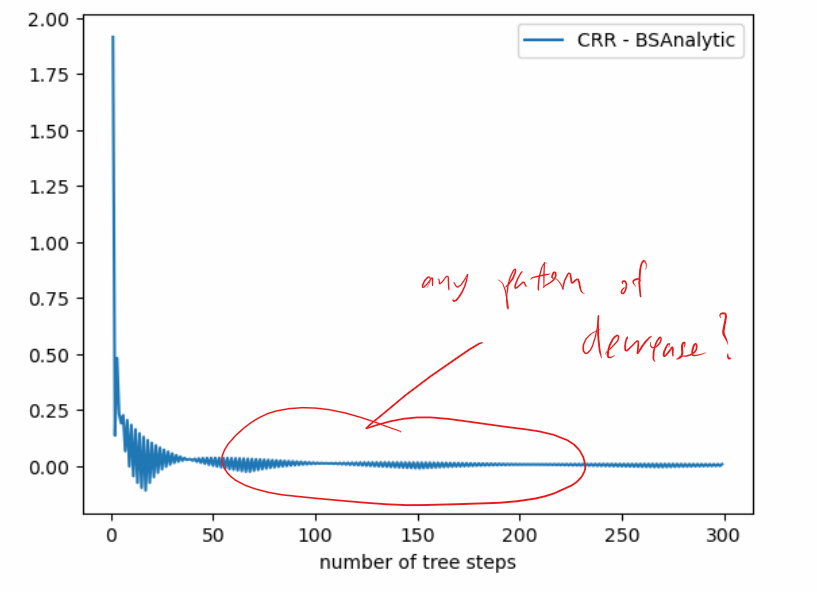

In [8]:
crrErrs

[1.9150350761628996,
 0.13430960926266522,
 0.48048612767441057,
 0.2324351987339872,
 0.1890346958493767,
 0.22472701595752742,
 0.06497636672810714,
 0.20343200486042434,
 -0.0035639058181882177,
 0.1815489037928062,
 -0.04700535431618125,
 0.16154294137610492,
 -0.07699079316048163,
 0.14373276211421082,
 -0.0989301726501548,
 0.12793890074924263,
 -0.11108524706614986,
 0.11388752102869049,
 -0.07701928261394642,
 0.1013168539713547,
 -0.05141105668450141,
 0.09000203237208027,
 -0.03184455419813137,
 0.0797564015288561,
 -0.01670906363303981,
 0.07042656025112759,
 -0.00489504676888064,
 0.06188644828541179,
 0.0043830550388728184,
 0.054032034963250375,
 0.011694546126935101,
 0.046776943425776096,
 0.01746037242833065,
 0.04004896249789347,
 0.021997259405919678,
 0.033787299391643266,
 0.025547186855368942,
 0.027940421165182805,
 0.028297541062553222,
 0.022464354840821876,
 0.030395182892364758,
 0.017321342364557957,
 0.031956452414060976,
 0.012478769945482249,
 0.033074402

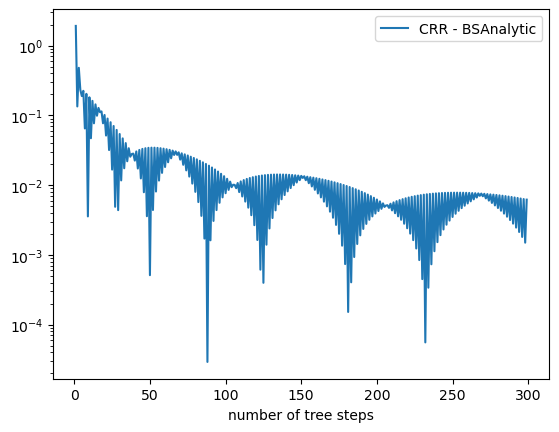

'\n\n'

In [9]:
n = 300
S, r, vol, K, T = 100, 0.01, 0.2, 105, 1.0
bsPrc = bsPrice(S, r, vol, T, K, PayoffType.Call)
crrErrs = [abs(crrBinomial(S,r,vol,PayoffType.Call,K,T,i) - bsPrc) for i in range(1, n)]

plt.plot(range(1, n), crrErrs, label = "CRR - BSAnalytic")
plt.xlabel('number of tree steps')
plt.yscale('log')
plt.legend()
# plt.yscale('log')
plt.show()

'''
log scale y axis
useful if a few very +ve or very -ve values
each tick on the axis represents a tenfold change in error magnitude. For example, a change from 10^-1 to 10^-2 reflects a 10 times decrease in error

log scale y axis makes it easier to see pattern when the pattern is of a small scale
'''

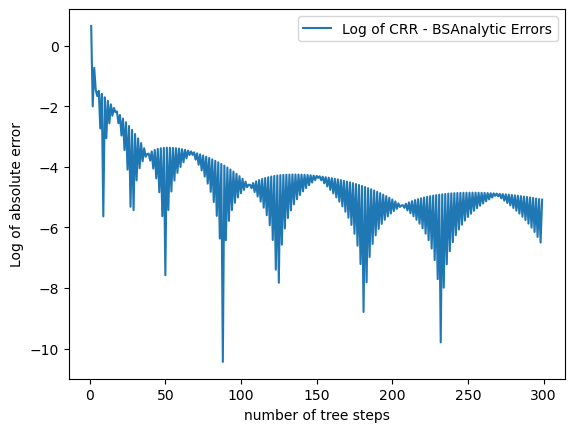

In [13]:
n = 300
S, r, vol, K, T = 100, 0.01, 0.2, 105, 1.0
bsPrc = bsPrice(S, r, vol, T, K, PayoffType.Call)
# Calculate CRR errors and then take the natural log of the errors
crrErrs = [abs(crrBinomial(S, r, vol, PayoffType.Call, K, T, i) - bsPrc) for i in range(1, n)]
log_crrErrs = np.log(crrErrs)  # Using NumPy's log function

plt.plot(range(1, n), log_crrErrs, label="Log of CRR - BSAnalytic Errors")
plt.xlabel('number of tree steps')
plt.ylabel('Log of absolute error')
plt.legend()
plt.show()

In [12]:
np.log(crrErrs)

array([  0.64973594,  -2.00760763,  -0.73295692,  -1.45914381,
        -1.6658247 ,  -1.49286888,  -2.73373166,  -1.59242346,
        -5.6368982 ,  -1.70623022,  -3.05749376,  -1.82298428,
        -2.56406943,  -1.93979952,  -2.313341  ,  -2.05620247,
        -2.19745738,  -2.17254398,  -2.56369946,  -2.2895025 ,
        -2.96790202,  -2.40792303,  -3.44688889,  -2.52877827,
        -4.09180397,  -2.65318481,  -5.31953145,  -2.78245405,
        -5.4300093 ,  -2.91817817,  -4.44863269,  -3.06236486,
        -4.0478214 ,  -3.21765251,  -3.81683741,  -3.3876703 ,
        -3.66722807,  -3.57768085,  -3.56498037,  -3.79582546,
        -3.49347114,  -4.05581588,  -3.44338117,  -4.38372648,
        -3.40899562,  -4.83984114,  -3.38658139,  -5.63093254,
        -3.37358341,  -7.57685438,  -3.3681898 ,  -5.42546526,
        -3.36908014,  -4.81536755,  -3.37527179,  -4.45409035,
        -3.38602197,  -4.19994514,  -3.40076311,  -4.00563194,
        -3.41905907,  -3.84947909,  -3.44057455,  -3.71